In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")


In [3]:
# Merge datasets
# Aggregate transaction data to create features
transaction_features = transactions.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum",
    "ProductID": "nunique"
}).rename(columns={"Quantity": "TotalQuantity", "TotalValue": "TotalRevenue", "ProductID": "UniqueProducts"})

# Combine with customer profile data
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year  # Extract year from signup date
customer_data = customers.merge(transaction_features, on="CustomerID", how="left").fillna(0)


In [4]:
# Select features for clustering
features = customer_data[["SignupYear", "TotalQuantity", "TotalRevenue", "UniqueProducts"]]

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [5]:
# Clustering
# Choose the number of clusters (e.g., 4 as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to the customer data
customer_data["Cluster"] = clusters

In [10]:
# Evaluation of Clustering Metrics

# 1. Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# 2. Silhouette Score
silhouette_avg = silhouette_score(normalized_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# 3. Inertia (Sum of Squared Distances to Centroids)
inertia = kmeans.inertia_
print(f"Inertia (Sum of Squared Distances): {inertia}")

# 4. Cluster Size
cluster_sizes = customer_data["Cluster"].value_counts()
print(f"Cluster Sizes:\n{cluster_sizes}")


Davies-Bouldin Index: 0.983786003283427
Silhouette Score: 0.3347376879025317
Inertia (Sum of Squared Distances): 255.9068994831411
Cluster Sizes:
Cluster
2    61
3    52
1    51
0    36
Name: count, dtype: int64


In [7]:
# Save clustering results
customer_data.to_csv("FirstName_LastName_Clustering.csv", index=False)


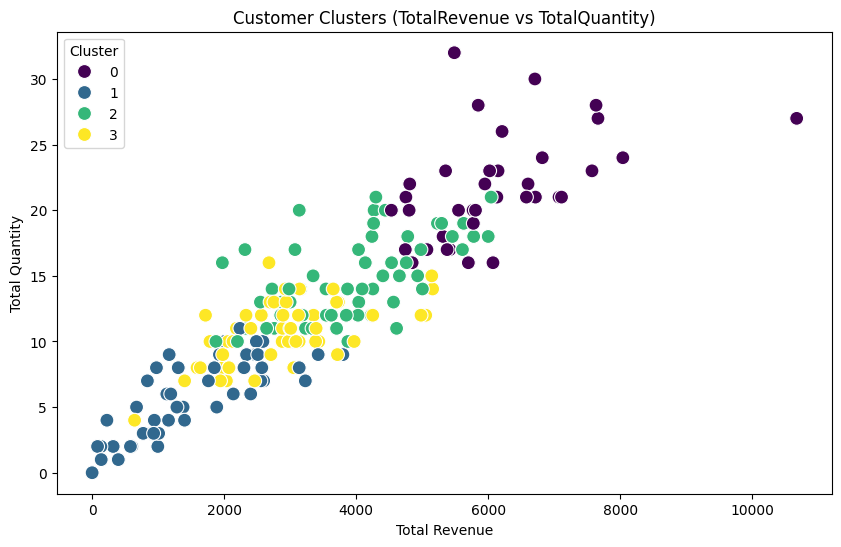

In [8]:
# Visualize clusters
# 2D Visualization using TotalRevenue and TotalQuantity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data["TotalRevenue"],
    y=customer_data["TotalQuantity"],
    hue=customer_data["Cluster"],
    palette="viridis",
    s=100
)
plt.title("Customer Clusters (TotalRevenue vs TotalQuantity)")
plt.xlabel("Total Revenue")
plt.ylabel("Total Quantity")
plt.legend(title="Cluster")
plt.show()

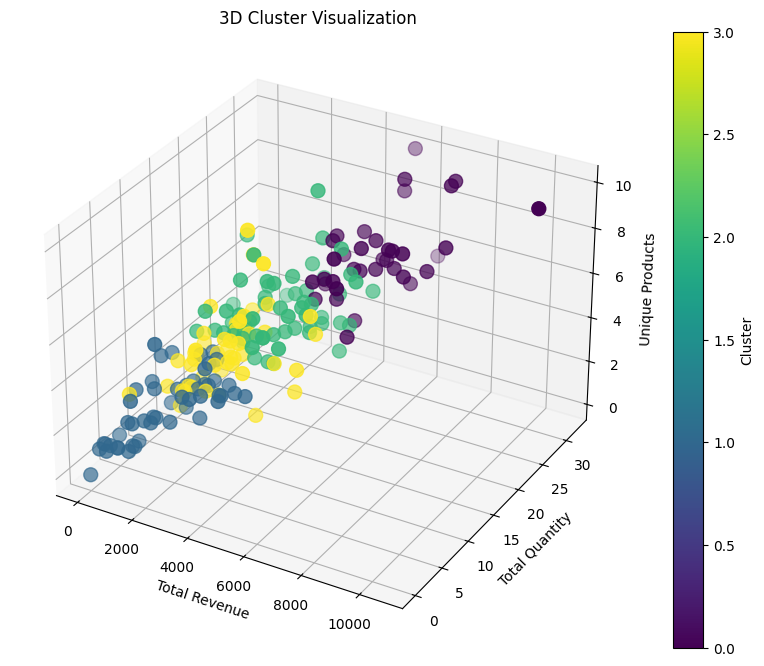

In [9]:
# 3D Visualization using matplotlib
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    customer_data["TotalRevenue"],
    customer_data["TotalQuantity"],
    customer_data["UniqueProducts"],
    c=customer_data["Cluster"],
    cmap="viridis",
    s=100
)
plt.colorbar(sc, label="Cluster")
ax.set_title("3D Cluster Visualization")
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Total Quantity")
ax.set_zlabel("Unique Products")
plt.show()